# PyTorch Transfer Learning

 1.   Freezing all the layers except the final one
 2.   Freezing the first few layers
 3.   Fine-tuning the entire network.

The following pre-trained models are available on PyTorch

 *   resnet18, resnet34, resnet50, resnet101, resnet152
 *   squeezenet1_0, squeezenet1_1
 *   Alexnet
 *   inception_v3
 *   Densenet121, Densenet169, Densenet201
 *   Vgg11, vgg13, vgg16, vgg19, vgg11_bn. vgg13_bn, vgg16_bn, vgg19_bn

In [1]:
import sys
sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
#import torch

In [3]:
!pip install Pillow
!pip install image

In [0]:
%matplotlib inline

In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

import pandas as pd

plt.ion()   # interactive mode

In [6]:
import torch
print(torch.__version__)

0.4.1


In [7]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [8]:
torch.cuda.is_available()

True

In [0]:
#  !pip install kaggle
  
#  from google.colab import files
#  files.upload()

  #The third step is create some folder
  #before importing the dataset we sholud use this code
  #The kaggle API client expects this file to be in ~/.kaggle

#  !mkdir -p ~/.kaggle
#  !cp kaggle.json ~/.kaggle/

  #this permissions change avoids a warnong on Kaggle tool startup
#  !chmod 600 ~/.kaggle/kaggle.json
  
#  !kaggle datasets download -d moltean/fruits
#  !ls

### Get Data

In [0]:
from zipfile import ZipFile
files = os.listdir()
if not 'fruits.zip' in files:
  !curl --header 'Host: storage.googleapis.com' --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:63.0) Gecko/20100101 Firefox/63.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --referer 'https://www.kaggle.com/' --cookie '_ga=GA1.3.597929118.1540370868' --header 'Upgrade-Insecure-Requests: 1' 'https://storage.googleapis.com/kaggle-datasets/5857/94583/fruits.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1543353373&Signature=rfXrXBZSWzulX89wVMZDAe94oaVLEUrANf5DzrxnaezszFEgWrtoWzGeDjVDStAn3jdczeSknwH5uS%2BJ8Q6QJLiEqoFcB2iM0LANrl6cc6RWXynmI0NxIUqhFeL%2BngeQF1eFNivl4aCKBZDsqW7%2BtIPAWyfpcBvXKP0ACgmnJt%2Fb%2BUe7NnLWZ9c353YPK4msQAvM5H5c40kXAzYX9er6XpX7HOTUkY%2FXrVhNhmuiorDFERNHhdzmBHepDJRRhY5x34NXw3z0pk6Rn7aToBh9yqNQ8aQDeekNrBDQky9KahJmupA5DpjdK76vA3jKX29Cw%2FnAdj9w7GyKiIZ1iYtm8g%3D%3D' --output 'fruits.zip'  #The first step is install kaggle

  # !pip install kaggle
#  from google.colab import files
#  files.upload()
#  !mkdir -p ~/.kaggle
#  !cp kaggle.json ~/.kaggle/
  #this permissions change avoids a warnong on Kaggle tool startup
#  !chmod 600 ~/.kaggle/kaggle.json  
#  !kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

  !ls
  full_file_name = "fruits.zip"
  with ZipFile(full_file_name, 'r') as zipF:
    zipF.extractall()
    print('Zip Done')
  
# file_name = "car_data.zip"
# with ZipFile(file_name, 'r') as zipF:
#   zipF.extractall()
#   print('Done')

In [11]:
!ls -l fruits-360


total 28
-rw-r--r--  1 root root 1110 Nov 26 14:52 LICENSE
drwxr-xr-x  2 root root 4096 Nov 26 14:52 papers
-rw-r--r--  1 root root 6116 Nov 26 14:52 readme.md
drwxr-xr-x 83 root root 4096 Nov 26 14:52 Test
drwxr-xr-x  2 root root 4096 Nov 26 14:52 test-multiple_fruits
drwxr-xr-x 83 root root 4096 Nov 26 14:52 Training


In [12]:
!ls -l fruits-360/Training

total 1692
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Braeburn'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Golden 1'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Golden 2'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Golden 3'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Granny Smith'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Red 1'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Red 2'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Red 3'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Red Delicious'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Apple Red Yellow'
drwxr-xr-x 2 root root 20480 Nov 26 14:52  Apricot
drwxr-xr-x 2 root root 20480 Nov 26 14:52  Avocado
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Avocado ripe'
drwxr-xr-x 2 root root 20480 Nov 26 14:52  Banana
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Banana Red'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Cactus fruit'
drwxr-xr-x 2 root root 20480 Nov 26 14:52 'Cantaloupe 1'
drwxr-xr-x 2 root r

In [0]:
data_dir = 'fruits-360'

train_dir = 'Training'
val_dir = 'Test'

In [0]:
# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
#model_name = "squeezenet"

# Number of classes in the dataset
#num_classes = 2

# Batch size for training (change depending on how much memory you have)
batch_size = 16

# Number of epochs to train for
num_epochs = 24

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = False

#Inception_v3 defined input size
#input_size = 100
input_size = 299


In [15]:
# again, list total number of classes, and list them all
# os.list dir sorting depends on OS dependent file indexing, so leaving it as it is

classes = os.listdir(f'{data_dir}/{train_dir}')
classes.sort()
ClassesNumer = len(classes)
print("Class Total Count: ", ClassesNumer)
#print(classes)


Class Total Count:  81


In [16]:
# parse all classes and assemble python list object []
# each list element will contain array of files names of a class

all_images_class = [os.listdir(f'{data_dir}/{train_dir}/'+c) for c in classes]
#int_to_classes = {i:classes[i] for i in range(len(classes))}
#classes_to_int = {classes[i]:i for i in range(len(classes))}
print("Classes: ",len(all_images_class) )

Classes:  81


In [17]:
all_images_class

[['0_100.jpg',
  '155_100.jpg',
  'r_190_100.jpg',
  'r_22_100.jpg',
  'r_198_100.jpg',
  '237_100.jpg',
  'r_116_100.jpg',
  '160_100.jpg',
  '291_100.jpg',
  '217_100.jpg',
  '211_100.jpg',
  '124_100.jpg',
  '252_100.jpg',
  'r_179_100.jpg',
  'r_272_100.jpg',
  'r_167_100.jpg',
  'r_135_100.jpg',
  '169_100.jpg',
  '284_100.jpg',
  '247_100.jpg',
  'r_13_100.jpg',
  'r_106_100.jpg',
  'r_182_100.jpg',
  'r_275_100.jpg',
  'r_122_100.jpg',
  '205_100.jpg',
  '145_100.jpg',
  'r_29_100.jpg',
  '140_100.jpg',
  '129_100.jpg',
  'r_136_100.jpg',
  '277_100.jpg',
  '313_100.jpg',
  '289_100.jpg',
  'r_171_100.jpg',
  'r_307_100.jpg',
  'r_12_100.jpg',
  '118_100.jpg',
  'r_2_100.jpg',
  'r_131_100.jpg',
  '186_100.jpg',
  '274_100.jpg',
  'r_295_100.jpg',
  'r_11_100.jpg',
  'r_180_100.jpg',
  'r_105_100.jpg',
  '311_100.jpg',
  '158_100.jpg',
  '17_100.jpg',
  '319_100.jpg',
  '148_100.jpg',
  '276_100.jpg',
  '112_100.jpg',
  '251_100.jpg',
  'r_138_100.jpg',
  '230_100.jpg',
  'r_186

In [18]:
# create python data dictionary {}, with key="text", and value as length(of size) of containing list object array (1D)
# gives histogram like file count for each class
dataDict= {"n_images": [len(x) for x in all_images_class]}
print("file count in each class: ",dataDict)
trainFiles = 0
for x in all_images_class:
  trainFiles = trainFiles+len(x)
print(" Total Train Files: ", trainFiles)

file count in each class:  {'n_images': [492, 492, 492, 481, 492, 492, 492, 429, 490, 492, 492, 427, 491, 490, 490, 490, 492, 492, 490, 492, 738, 738, 492, 492, 492, 490, 490, 490, 490, 492, 490, 490, 490, 492, 490, 490, 490, 466, 490, 492, 490, 490, 490, 490, 490, 490, 738, 492, 492, 479, 492, 490, 492, 492, 492, 490, 490, 490, 490, 492, 492, 490, 493, 490, 447, 492, 490, 492, 490, 490, 492, 738, 490, 490, 738, 672, 738, 479, 492, 367, 735]}
 Total Train Files:  41322


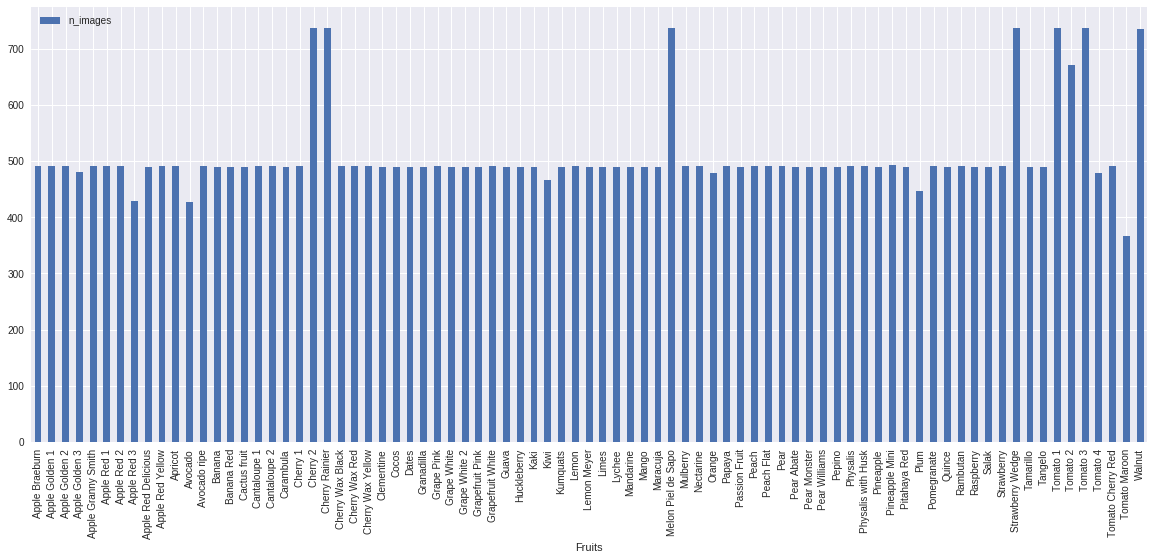

In [19]:
# assemble panda Dataframe {class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)}
# Train Data set
df = pd.DataFrame(dataDict, index=classes)
df.index.name = "Fruits"  
df.plot(kind="bar", grid=True,figsize=(20,8))

In [20]:
# create python data dictionary {}, path/file and image size(x,y)
# ps very long processing time
#e_d = {k: PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

for dirpath, dirnames, filenames in os.walk(f'{data_dir}/{train_dir}'):
    #print(PIL.Image.open(filenames).size)
    i=0
    label=''
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        label=os.path.split(dirpath)[1]
        i+=1
    print(label,i)

 0
Pear 492
Physalis with Husk 492
Limes 490
Plum 447
Pomegranate 492
Mulberry 492
Cantaloupe 1 492
Tomato 2 672
Pineapple Mini 493
Apple Red 2 492
Cherry Wax Red 492
Grapefruit Pink 490
Orange 479
Kumquats 490
Apricot 492
Kiwi 466
Apple Granny Smith 492
Guava 490
Banana Red 490
Tomato 4 479
Avocado 427
Tomato Cherry Red 492
Banana 490
Apple Red 3 429
Apple Red Delicious 490
Cocos 490
Apple Braeburn 492
Clementine 490
Pear Monster 490
Mandarine 490
Lemon Meyer 490
Lemon 492
Tomato 3 738
Peach 492
Cactus fruit 490
Grape Pink 492
Huckleberry 490
Mango 490
Cantaloupe 2 492
Tomato Maroon 367
Passion Fruit 490
Rambutan 492
Tomato 1 738
Cherry 2 738
Grape White 2 490
Apple Red Yellow 492
Peach Flat 492
Avocado ripe 491
Dates 490
Cherry 1 492
Raspberry 490
Carambula 490
Grape White 490
Apple Golden 3 481
Papaya 492
Pitahaya Red 490
Melon Piel de Sapo 738
Pineapple 490
Granadilla 490
Apple Golden 1 492
Strawberry Wedge 738
Lychee 490
Cherry Rainier 738
Tangelo 490
Cherry Wax Black 492
Pepino 4

In [0]:
def initialize_model(num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0
    model_ft = models.inception_v3(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    # Handle the auxilary net
    num_ftrs = model_ft.AuxLogits.fc.in_features
    model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
    # Handle the primary net
    num_ftrs = model_ft.fc.in_features
    model_ft.fc = nn.Linear(num_ftrs,num_classes)
    input_size = 299
    return model_ft

In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [23]:
# Initialize the model for this run
model_ft = initialize_model( ClassesNumer, feature_extract, use_pretrained=True)

# Print the model we just instantiated
print(model_ft)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    train_dir: transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
       # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    val_dir: transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
}

In [0]:

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),data_transforms[x]) for x in [train_dir, val_dir]}

dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in [train_dir, val_dir]}

dataset_sizes = {x: len(image_datasets[x]) for x in [train_dir, val_dir]}

class_names = image_datasets[train_dir].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [26]:
print(dataloaders_dict)
print(dataset_sizes)
print(device)

{'Training': <torch.utils.data.dataloader.DataLoader object at 0x7f7f3af9ada0>, 'Test': <torch.utils.data.dataloader.DataLoader object at 0x7f7f3afc5908>}
{'Training': 41322, 'Test': 13877}
cuda:0


In [27]:
print(image_datasets[train_dir])


Dataset ImageFolder
    Number of datapoints: 41322
    Root Location: fruits-360/Training
    Transforms (if any): Compose(
                             RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None


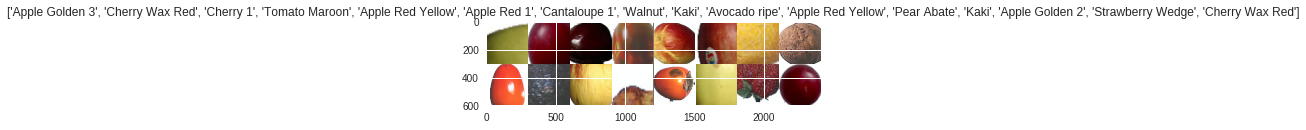

In [28]:
#Let’s visualize a few training images so as to understand the data augmentations.
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders_dict[train_dir]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

###Training the model

Now, let’s write a general function to train a model. Here, we will illustrate:

    Scheduling the learning rate
    Saving the best model

In the following, parameter ''scheduler'' is an LR scheduler object from ''torch.optim.lr_scheduler''.

In [0]:
def train_model_orig(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in [train_dir, val_dir]:
            if phase == train_dir:
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == train_dir):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == train_dir:
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == val_dir and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [0]:
#def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=True):
def train_model(model, dataloaders, criterion, optimizer, scheduler, num_epochs=25, is_inception=True):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in [train_dir, val_dir]:
            if phase == train_dir:
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == train_dir):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.
                    if is_inception and phase == train_dir:
                        # From https://discuss.pytorch.org/t/how-to-optimize-inception-model-with-auxiliary-classifiers/7958
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == train_dir:
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == val_dir and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == val_dir:
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

In [31]:
#create optimizer
# Send the model to GPU
model_ft = model_ft.to(device)

# Gather the parameters to be optimized/updated in this run. If we are
#  finetuning we will be updating all parameters. However, if we are 
#  doing feature extract method, we will only update the parameters
#  that we have just initialized, i.e. the parameters with requires_grad
#  is True.
params_to_update = model_ft.parameters()
print("Params to learn:")
if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(params_to_update, lr=0.01, momentum=0.9)

Params to learn:
	 Conv2d_1a_3x3.conv.weight
	 Conv2d_1a_3x3.bn.weight
	 Conv2d_1a_3x3.bn.bias
	 Conv2d_2a_3x3.conv.weight
	 Conv2d_2a_3x3.bn.weight
	 Conv2d_2a_3x3.bn.bias
	 Conv2d_2b_3x3.conv.weight
	 Conv2d_2b_3x3.bn.weight
	 Conv2d_2b_3x3.bn.bias
	 Conv2d_3b_1x1.conv.weight
	 Conv2d_3b_1x1.bn.weight
	 Conv2d_3b_1x1.bn.bias
	 Conv2d_4a_3x3.conv.weight
	 Conv2d_4a_3x3.bn.weight
	 Conv2d_4a_3x3.bn.bias
	 Mixed_5b.branch1x1.conv.weight
	 Mixed_5b.branch1x1.bn.weight
	 Mixed_5b.branch1x1.bn.bias
	 Mixed_5b.branch5x5_1.conv.weight
	 Mixed_5b.branch5x5_1.bn.weight
	 Mixed_5b.branch5x5_1.bn.bias
	 Mixed_5b.branch5x5_2.conv.weight
	 Mixed_5b.branch5x5_2.bn.weight
	 Mixed_5b.branch5x5_2.bn.bias
	 Mixed_5b.branch3x3dbl_1.conv.weight
	 Mixed_5b.branch3x3dbl_1.bn.weight
	 Mixed_5b.branch3x3dbl_1.bn.bias
	 Mixed_5b.branch3x3dbl_2.conv.weight
	 Mixed_5b.branch3x3dbl_2.bn.weight
	 Mixed_5b.branch3x3dbl_2.bn.bias
	 Mixed_5b.branch3x3dbl_3.conv.weight
	 Mixed_5b.branch3x3dbl_3.bn.weight
	 Mixed_5b.b

In [0]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Train and evaluate
#model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, num_epochs=num_epochs, is_inception=True)
model_ft, hist = train_model(model_ft, dataloaders_dict, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=num_epochs, is_inception=True)

Epoch 0/23
----------
Training Loss: 1.1322 Acc: 0.7522
Test Loss: 0.0805 Acc: 0.9729

Epoch 1/23
----------
Training Loss: 0.3268 Acc: 0.9202
Test Loss: 0.0547 Acc: 0.9800

Epoch 2/23
----------
Training Loss: 0.2155 Acc: 0.9465
Test Loss: 0.0312 Acc: 0.9865

Epoch 3/23
----------
Training Loss: 0.1706 Acc: 0.9573
Test Loss: 0.0786 Acc: 0.9869

Epoch 4/23
----------
Training Loss: 0.1314 Acc: 0.9663
Test Loss: 0.0303 Acc: 0.9856

Epoch 5/23
----------
Training Loss: 0.1237 Acc: 0.9683
Test Loss: 0.0224 Acc: 0.9893

Epoch 6/23
----------
Training Loss: 0.1063 Acc: 0.9729
Test Loss: 0.0283 Acc: 0.9882

Epoch 7/23
----------
Training Loss: 0.0580 Acc: 0.9837
Test Loss: 0.0223 Acc: 0.9917

Epoch 8/23
----------
Training Loss: 0.0449 Acc: 0.9863
Test Loss: 0.0235 Acc: 0.9910

Epoch 9/23
----------
Training Loss: 0.0426 Acc: 0.9878
Test Loss: 0.0182 Acc: 0.9914

Epoch 10/23
----------
Training Loss: 0.0389 Acc: 0.9880
Test Loss: 0.0181 Acc: 0.9919

Epoch 11/23
----------
Training Loss: 0.03

In [0]:
# Load a pretrained model and reset final fully connected layer
#model_ft = models.resnet152(pretrained=True)
#num_ftrs = model_ft.fc.in_features
#model_ft.fc = nn.Linear(num_ftrs, 2)
#model_ft.fc = nn.Linear(num_ftrs, ClassesNumer)

#model_ft = model_ft.to(device)

#criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [0]:
# Train and evaluate
#model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)


In [0]:
# Generic function to display predictions for a few images
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders_dict[val_dir]):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [0]:
visualize_model(model_ft)

ConvNet as fixed feature extractor: Training only the last fully connected layer
----------------------
Here, we need to freeze all the network except the final layer. We need
to set ``requires_grad == False`` to freeze the parameters so that the
gradients are not computed in ``backward()``.

You can read more about this in the documentation
`here <http://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward>`__.




In [0]:
model_conv = torchvision.models.resnet18(pretrained=True)

for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default

## Change the last layer
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, ClassesNumer)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opoosed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [0]:
# Train and evaluate
# This is expected as gradients don't need to be computed for most of the network. 
# However, forward does need to be computed.

#model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

In [0]:
#visualize_model(model_conv)

#plt.ioff()
#plt.show()